In [1]:
import itertools
import numpy as np

sentences = '''
sam is red
hannah not red
hannah is green
bob is green
bob not red
sam not green
sarah is red
sarah not green'''.strip().split('\n')

In [2]:
sentences

['sam is red',
 'hannah not red',
 'hannah is green',
 'bob is green',
 'bob not red',
 'sam not green',
 'sarah is red',
 'sarah not green']

In [3]:
is_green = np.asarray([[0, 1, 1, 1, 1, 0, 0, 0]], dtype='int32').T


In [4]:
is_green

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [5]:
print type(is_green)

<type 'numpy.ndarray'>


In [6]:
lemma = lambda x: x.strip().lower().split(' ')
sentences_lemmatized = [lemma(sentence) for sentence in sentences]

In [9]:
sentences_lemmatized

[['sam', 'is', 'red'],
 ['hannah', 'not', 'red'],
 ['hannah', 'is', 'green'],
 ['bob', 'is', 'green'],
 ['bob', 'not', 'red'],
 ['sam', 'not', 'green'],
 ['sarah', 'is', 'red'],
 ['sarah', 'not', 'green']]

In [10]:
words = set(itertools.chain(*sentences_lemmatized))

In [12]:
print words


set(['sarah', 'sam', 'hannah', 'is', 'green', 'not', 'bob', 'red'])


In [15]:
word2idx = dict((v, i) for i, v in enumerate(words))
print word2idx


{'sarah': 0, 'sam': 1, 'hannah': 2, 'is': 3, 'green': 4, 'not': 5, 'bob': 6, 'red': 7}


In [16]:
idx2word = list(words)
print idx2word

['sarah', 'sam', 'hannah', 'is', 'green', 'not', 'bob', 'red']


In [17]:
to_idx = lambda x: [word2idx[word] for word in x]
print to_idx

<function <lambda> at 0x10b62fb18>


In [18]:
sentences_idx = [to_idx(sentence) for sentence in sentences_lemmatized]
print sentences_idx


[[1, 3, 7], [2, 5, 7], [2, 3, 4], [6, 3, 4], [6, 5, 7], [1, 5, 4], [0, 3, 7], [0, 5, 4]]


In [20]:
sentences_array = np.asarray(sentences_idx, dtype='int32')
print sentences_array


[[1 3 7]
 [2 5 7]
 [2 3 4]
 [6 3 4]
 [6 5 7]
 [1 5 4]
 [0 3 7]
 [0 5 4]]


In [43]:
# parameters for the model
sentence_maxlen = 3
n_words = len(words)
n_embed_dims = 3

# put together a model to predict
from keras.layers import Input, Embedding, merge, Flatten
from keras.layers.recurrent import SimpleRNN
from keras.models import Model

In [44]:
input_sentence = Input(shape=(sentence_maxlen,), dtype='int32')
print type(input_sentence)

<class 'theano.tensor.var.TensorVariable'>


In [45]:
input_embedding = Embedding(n_words, n_embed_dims)(input_sentence)
print type(input_embedding)

MemoryError: ('Error allocating 96 bytes of device memory (unspecified launch failure).', "you might consider using 'theano.shared(..., borrow=True)'")

In [27]:
color_prediction = SimpleRNN(1)(input_embedding)

In [30]:
predict_green = Model(input=[input_sentence], output=[color_prediction])
print predict_green

In [31]:
predict_green.compile(optimizer='sgd', loss='binary_crossentropy')

In [39]:
predict_green.fit([sentences_array], [is_green], nb_epoch=5000, verbose=1)

Epoch 1/5000


MemoryError: Error allocating 32 bytes of device memory (unspecified launch failure).
Apply node that caused the error: GpuFromHost(simplernn_1_target)
Toposort index: 13
Inputs types: [TensorType(float32, matrix)]
Inputs shapes: [(8, 1)]
Inputs strides: [(4, 4)]
Inputs values: ['not shown']
Outputs clients: [[GpuElemwise{sub,no_inplace}(CudaNdarrayConstant{error while transferring the value: error (unspecified launch failure)copying data to host}, GpuFromHost.0), GpuElemwise{Composite{(i0 * (((i1 * i2 * i3 * i4) / (i5 * i6 * i7 * i8)) + ((i2 * i3 * i9) / (i5 * i6 * i7 * i10))))}}[(0, 0)](GpuElemwise{Composite{Cast{float32}(AND(GE(i0, i1), LE(i0, i2)))},no_inplace}.0, CudaNdarrayConstant{error while transferring the value: error (unspecified launch failure)copying data to host}, GpuDimShuffle{x,x}.0, GpuDimShuffle{0,x}.0, GpuFromHost.0, GpuDimShuffle{x,x}.0, GpuDimShuffle{x,x}.0, GpuDimShuffle{x,x}.0, GpuElemwise{Clip}[(0, 0)].0, GpuElemwise{sub,no_inplace}.0, GpuElemwise{sub,no_inplace}.0), GpuElemwise{Composite{((i0 * log(i1)) + (i2 * log(i3)))}}[(0, 0)](GpuFromHost.0, GpuElemwise{Clip}[(0, 0)].0, GpuElemwise{sub,no_inplace}.0, GpuElemwise{sub,no_inplace}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [40]:
embeddings = predict_green.layers[1].W.get_value()
print embeddings

RuntimeError: error (unspecified launch failure)copying data to host

In [36]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

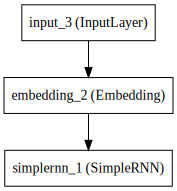

In [37]:
SVG(model_to_dot(predict_green).create(prog='dot', format='svg'))